<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-14 08:00:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  48.2MB/s    in 3.9s    

2025-08-14 08:00:40 (52.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


**Demo 2: List all tables**


In [ ]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


**Demo 3: Group data by age**


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


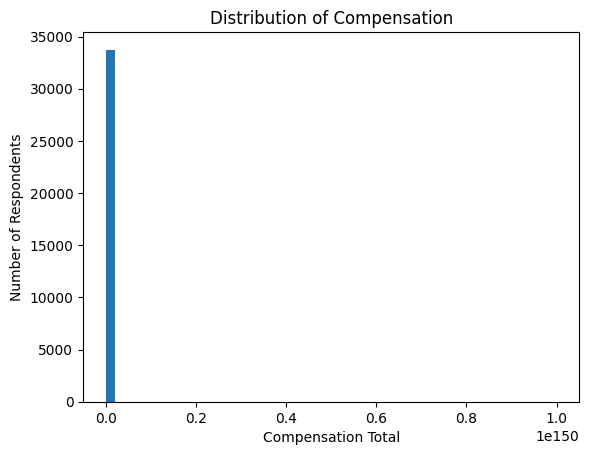

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect("survey-data.sqlite")
df = pd.read_sql_query("SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL", conn)

plt.hist(df["CompTotal"], bins=50)
plt.xlabel("Compensation Total")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Compensation")
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


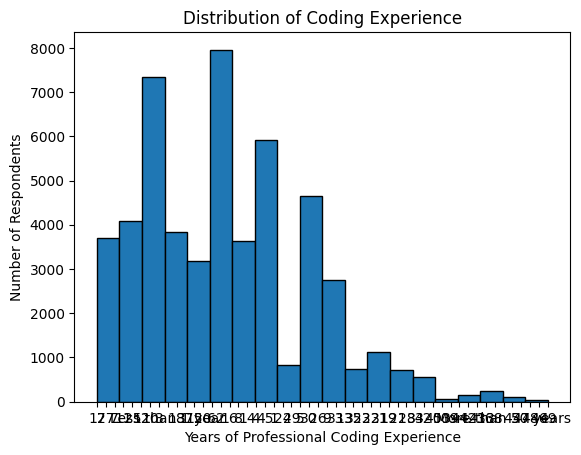

In [22]:
df_years = pd.read_sql_query("SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL", conn)
plt.hist(df_years['YearsCodePro'], bins=20, edgecolor='black')
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Coding Experience")
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


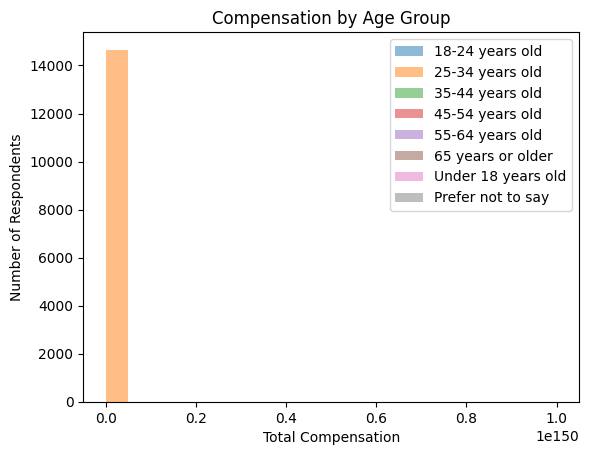

In [23]:
df_age_comp = pd.read_sql_query("SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL", conn)
age_groups = df_age_comp['Age'].unique()
for age in age_groups:
    subset = df_age_comp[df_age_comp['Age'] == age]
    plt.hist(subset['CompTotal'], bins=20, alpha=0.5, label=str(age))
plt.xlabel("Total Compensation")
plt.ylabel("Number of Respondents")
plt.title("Compensation by Age Group")
plt.legend()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


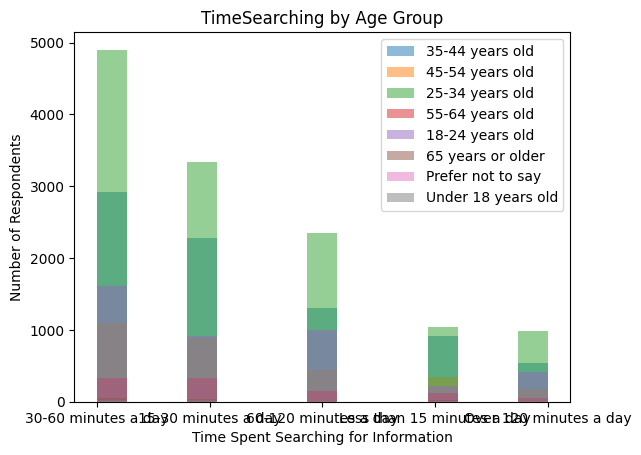

In [24]:
df_age_time = pd.read_sql_query("SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL", conn)
age_groups = df_age_time['Age'].unique()
for age in age_groups:
    subset = df_age_time[df_age_time['Age'] == age]
    plt.hist(subset['TimeSearching'], bins=15, alpha=0.5, label=str(age))
plt.xlabel("Time Spent Searching for Information")
plt.ylabel("Number of Respondents")
plt.title("TimeSearching by Age Group")
plt.legend()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


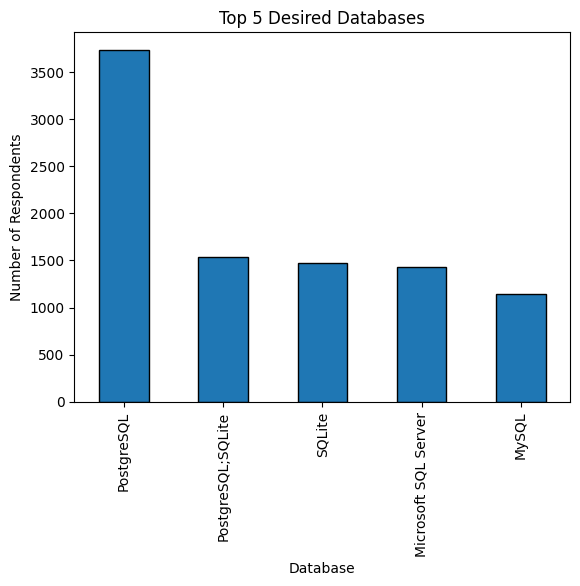

In [25]:
df_db = pd.read_sql_query("SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL", conn)
db_counts = df_db['DatabaseWantToWorkWith'].value_counts().head(5)
db_counts.plot(kind='bar', edgecolor='black')
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Top 5 Desired Databases")
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


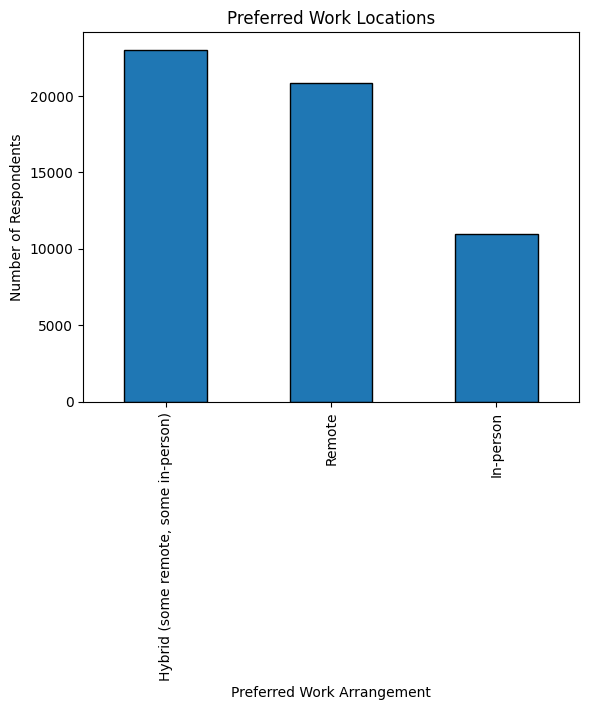

In [26]:
df_remote = pd.read_sql_query("SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL", conn)
df_remote['RemoteWork'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel("Preferred Work Arrangement")
plt.ylabel("Number of Respondents")
plt.title("Preferred Work Locations")
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


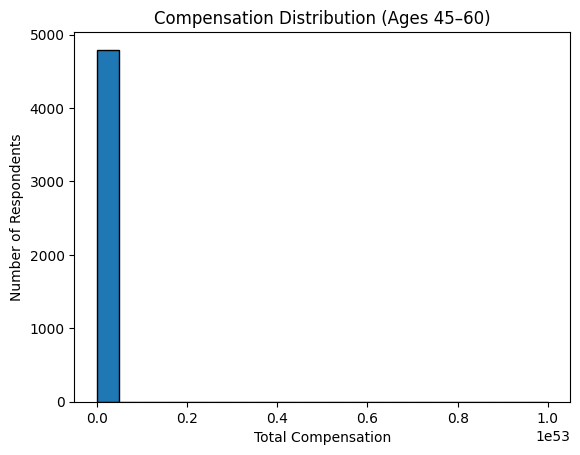

In [27]:
df_mid_career = pd.read_sql_query("""
SELECT CompTotal FROM main 
WHERE Age >= 45 AND Age <= 60 AND CompTotal IS NOT NULL
""", conn)
plt.hist(df_mid_career['CompTotal'], bins=20, edgecolor='black')
plt.xlabel("Total Compensation")
plt.ylabel("Number of Respondents")
plt.title("Compensation Distribution (Ages 45–60)")
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [29]:
years_groups = df['YearsCodePro'].dropna().unique()
plt.figure(figsize=(12,6))
for years in years_groups:
    plt.hist(df[df['YearsCodePro'] == years]['JobSat'].dropna(),
             bins=10, alpha=0.5, label=str(years))
plt.title('Job Satisfaction by Years of Professional Coding')
plt.xlabel('Job Satisfaction (JobSat)')
plt.ylabel('Frequency')
plt.legend(title='YearsCodePro', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

KeyError: 'YearsCodePro'

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
